In [1]:
install.packages("rpart")
install.packages("rpart.plot")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("grid")
install.packages("gridExtra")

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”
Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [2]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(dplyr)
library(grid)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
data_set <- read.csv("./dataset.csv", header = TRUE)

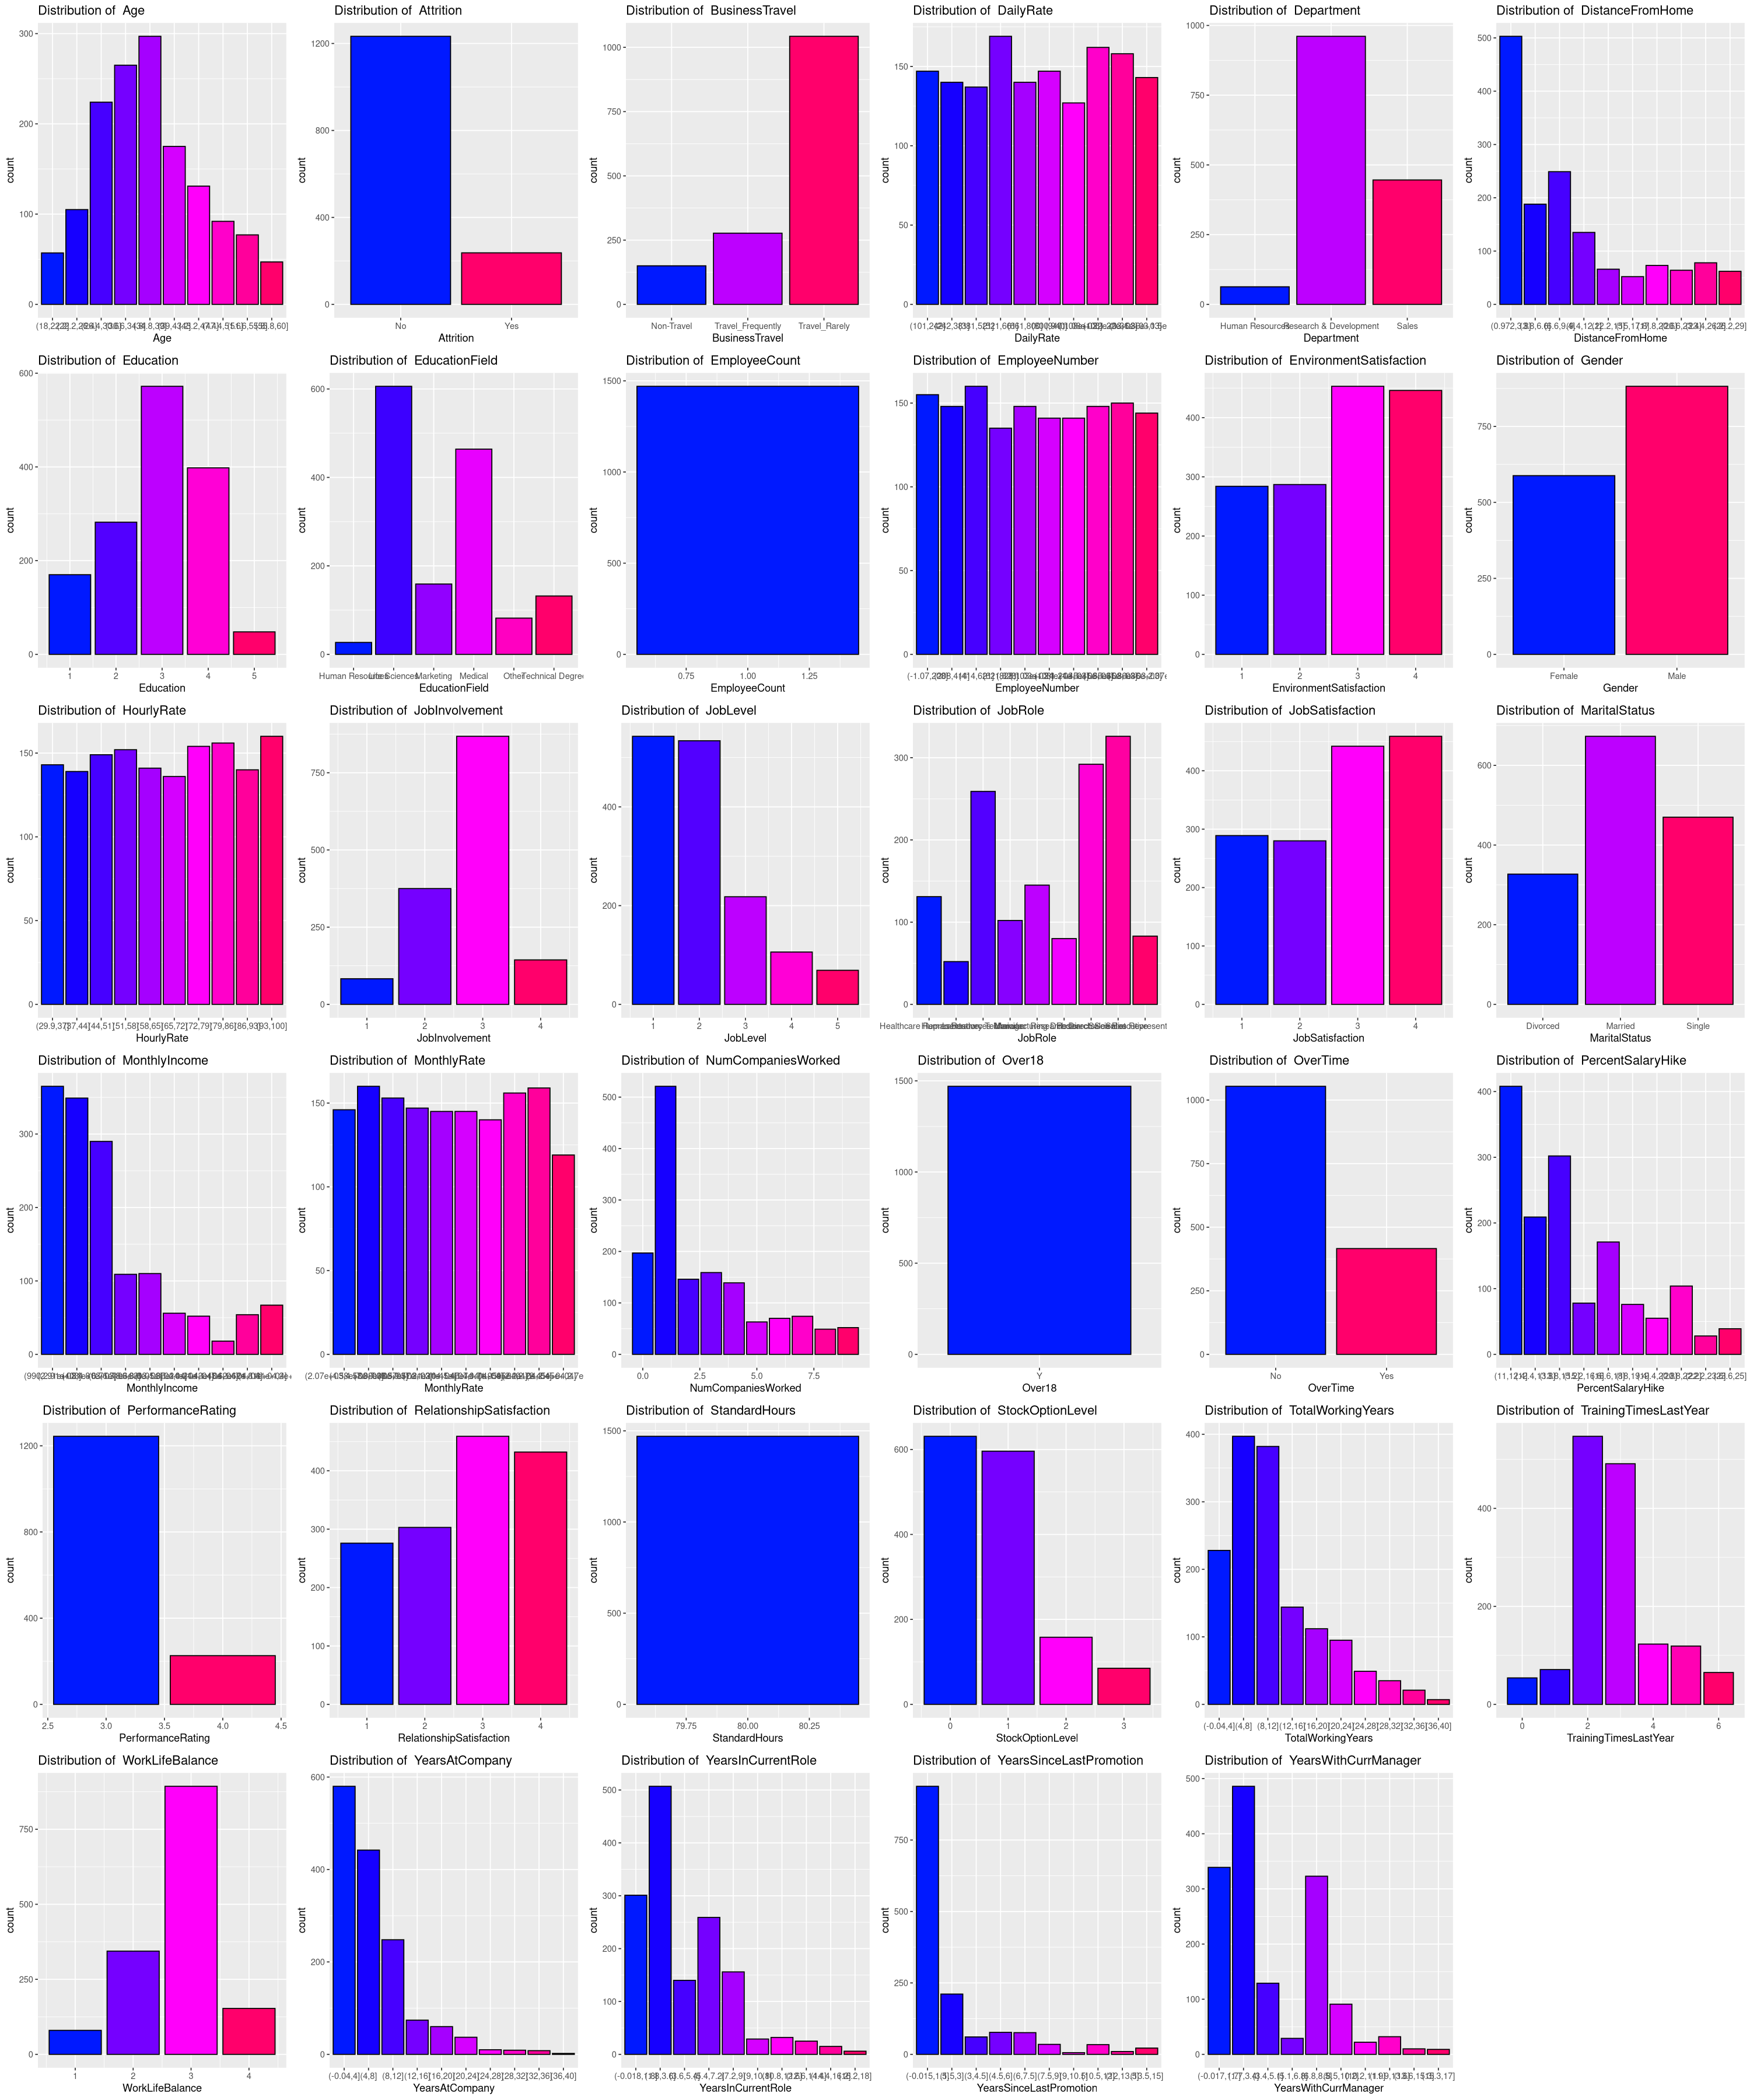

In [72]:
plot_data <- data_set
plot_list <- list()

for (feature in names(data_set)){
        if(is.numeric(data_set[[feature]]) && length(unique(data_set[[feature]])) > 10){
                plot_data[, feature] <- cut(plot_data[, feature], breaks = 10)
        }
        plot_list[[feature]] <- ggplot(plot_data, aes(x = !!sym(feature))) + 
                geom_bar(stat = "count", col = "black", fill = rainbow(length(unique(plot_data[[feature]])), start = 0.65, end = 0.93)) + 
                ggtitle(paste("Distribution of ", feature))
}

options(repr.plot.width = 25, repr.plot.height = 30)
do.call(grid.arrange, c(plot_list, ncol = 6))

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


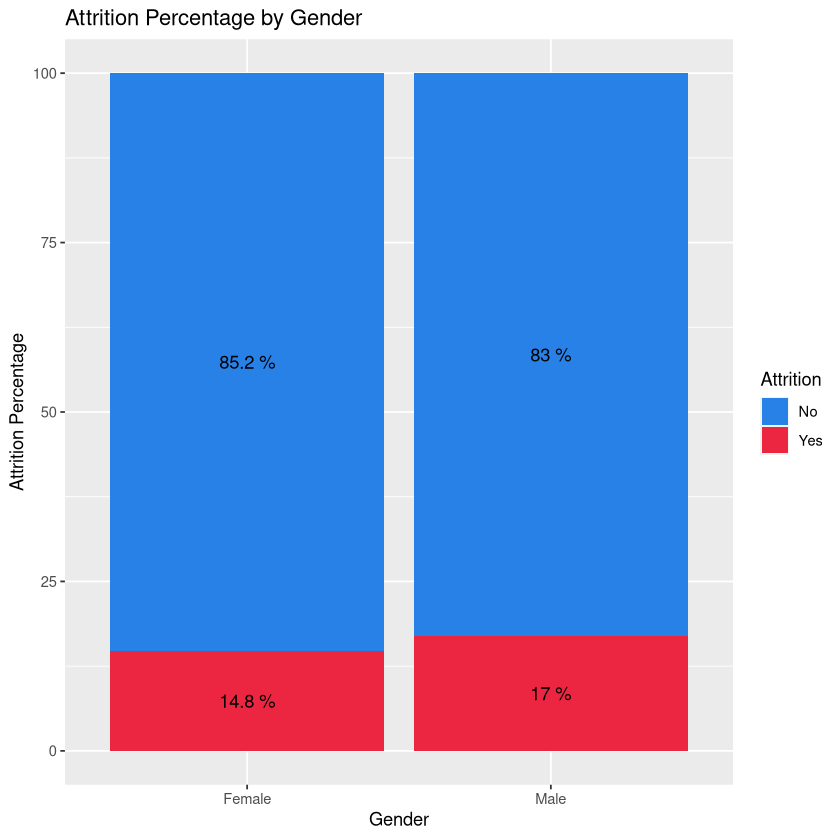

In [20]:
# Calculate attrition percentage by department and Attrition
attrition_by_gender <- data_set %>%
  group_by(Gender, Attrition) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = Count / sum(Count) * 100)

# Plot the results
ggplot(attrition_by_gender, aes(x = Gender, y = Percentage, fill = Attrition)) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5)) +
  ylab("Attrition Percentage") +
  xlab("Gender") +
  ggtitle("Attrition Percentage by Gender") +
  scale_fill_manual(values = c("Yes" = "#ec2540", "No" = "#2881e7"))

`geom_smooth()` using formula = 'y ~ x'


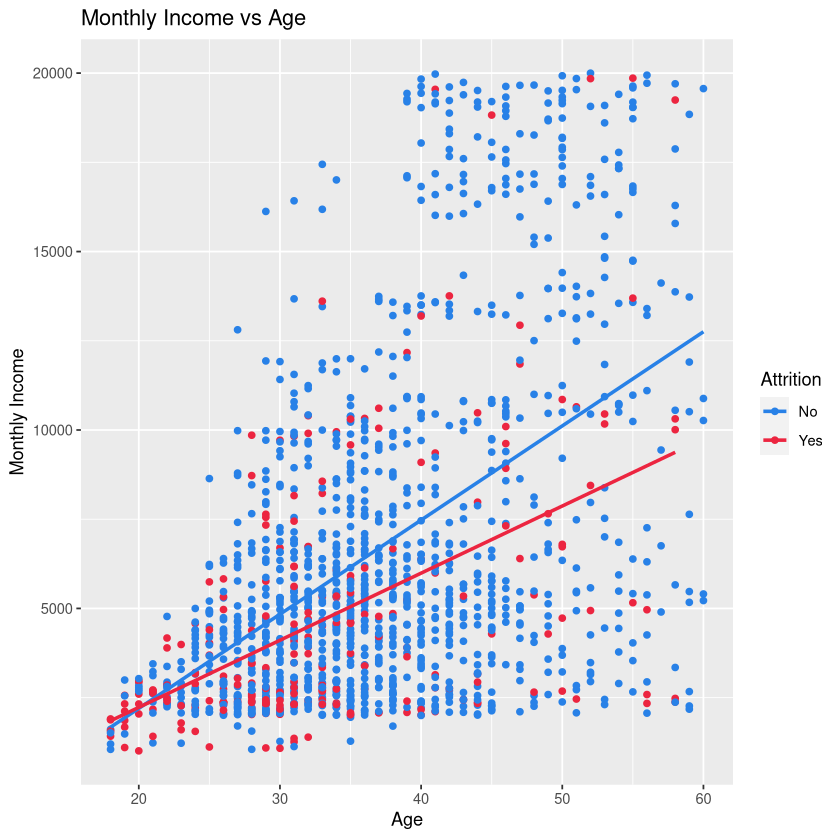

In [35]:
ggplot(data_set, aes(x = Age, y = MonthlyIncome, color = Attrition)) +
  geom_point() +
  scale_color_manual(values = c("Yes" = "#ec2540", "No" = "#2881e7"))

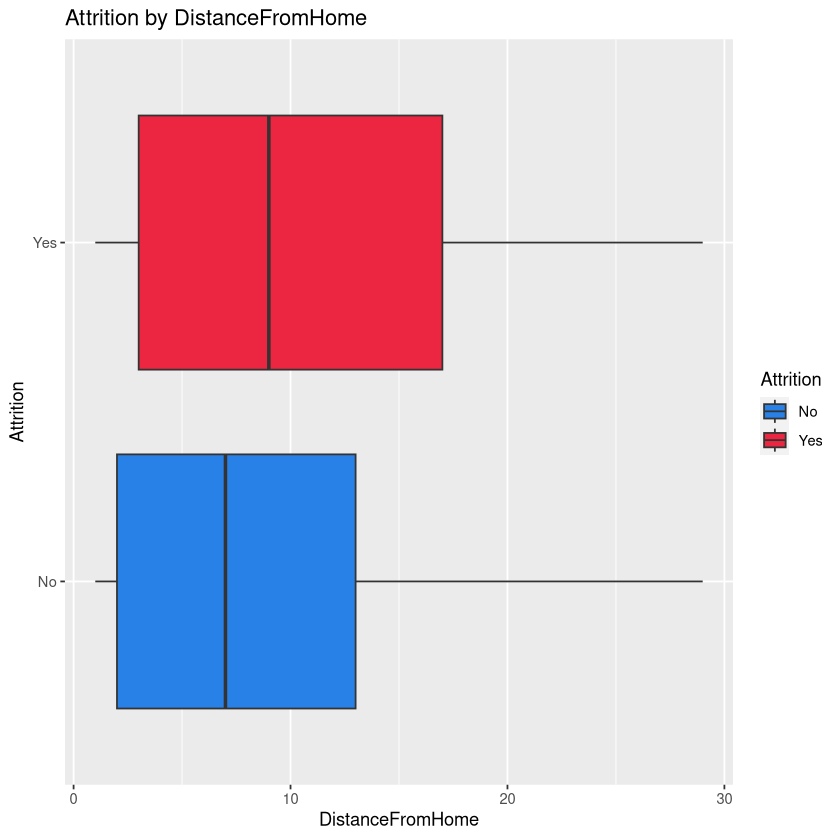

In [42]:
# Box plot for attrition by DistanceFromHome
ggplot(data_set, aes(x = Attrition, y = DistanceFromHome, fill = Attrition)) +
  geom_boxplot() +
  coord_flip() +
  ggtitle("Attrition by DistanceFromHome") +
  scale_fill_manual(values = c("Yes" = "#ec2540", "No" = "#2881e7"))

Warning message:
“Use of `data_set$StockOptionLevel` is discouraged.
ℹ Use `StockOptionLevel` instead.”
Warning message:
“Use of `data_set$Attrition` is discouraged.
ℹ Use `Attrition` instead.”


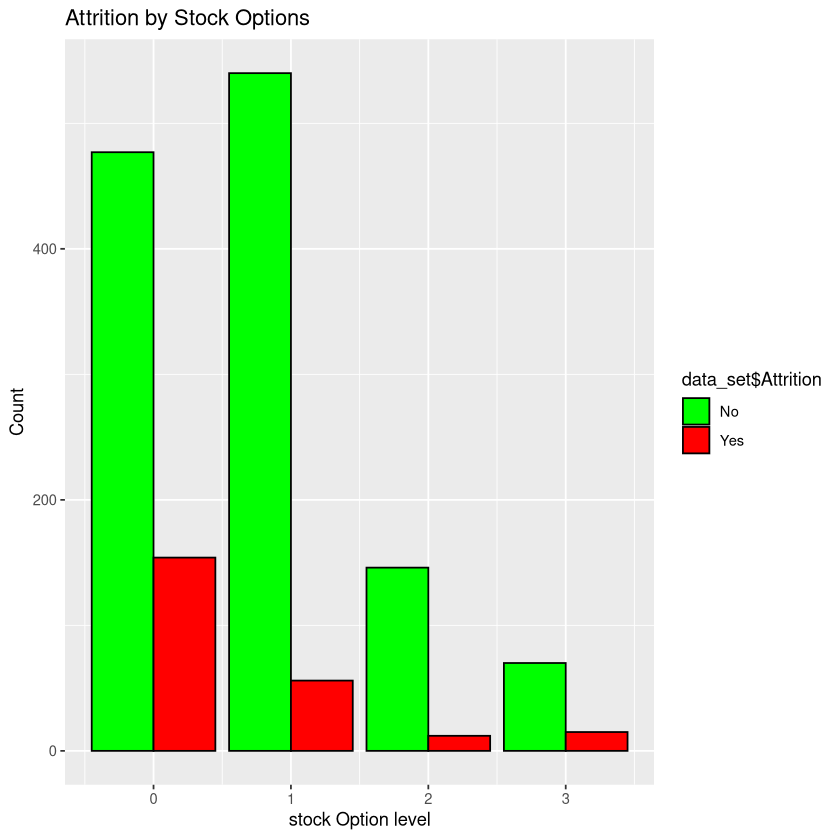

In [41]:

ggplot(data = data_set, aes(x = data_set$StockOptionLevel, fill = data_set$Attrition)) +
  geom_bar(position = "dodge", color = "black", stat = "count") +
  labs(title = "Attrition by Stock Options",
       x = "stock Option level",
       y = "Count") +
  scale_fill_manual(values = c("No" = "green", "Yes" = "red"))

Warning message:
“Use of `data_set$PercentSalaryHike` is discouraged.
ℹ Use `PercentSalaryHike` instead.”
Warning message:
“Use of `data_set$Attrition` is discouraged.
ℹ Use `Attrition` instead.”


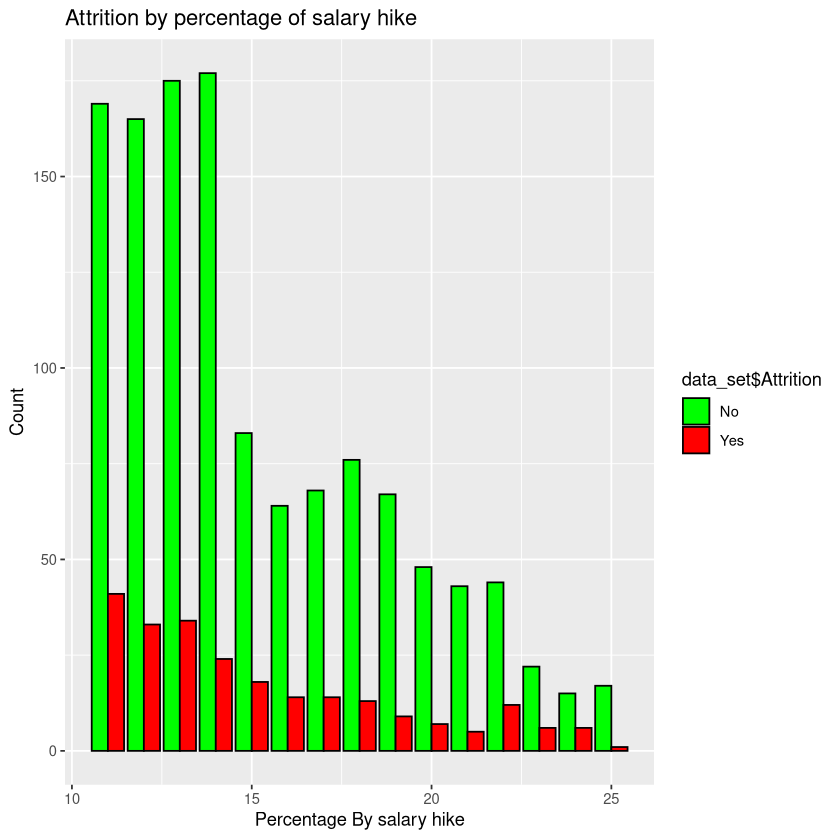

In [10]:

ggplot(data = data_set, aes(x = data_set$PercentSalaryHike, fill = data_set$Attrition)) +
  geom_bar(position = "dodge", color = "black", stat = "count") +
  labs(title = "Attrition by percentage of salary hike",
       x = "Percentage By salary hike",
       y = "Count") +
  scale_fill_manual(values = c("No" = "green", "Yes" = "red"))

Warning message:
“Use of `data_set$EmployeeNumber` is discouraged.
ℹ Use `EmployeeNumber` instead.”


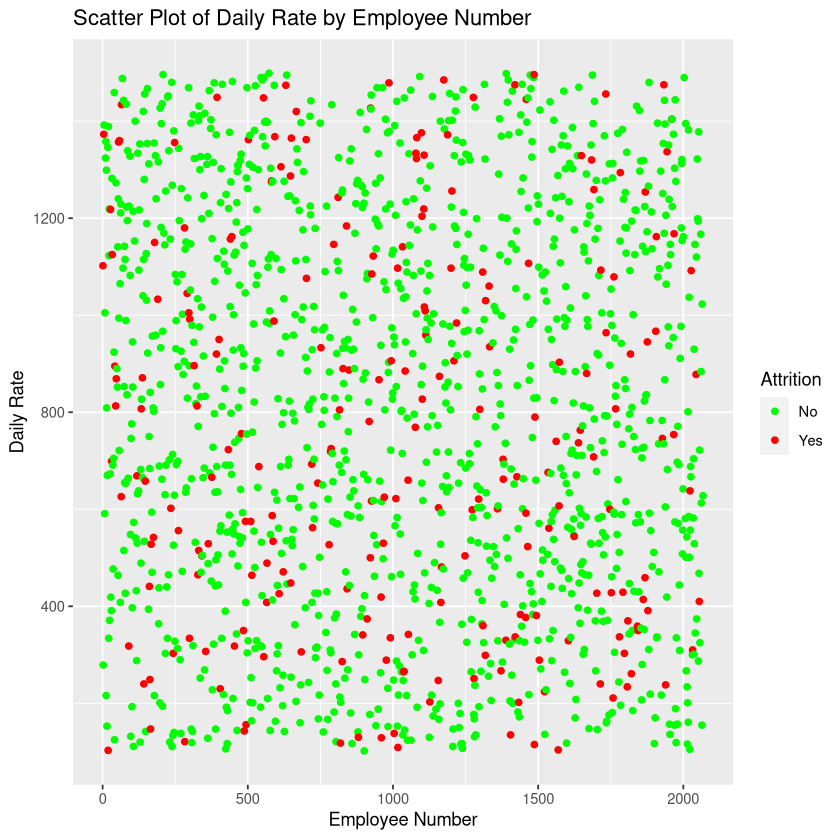

In [11]:
#for the scatter plot this plot shows that the attrition is not accuracy if take arguments with daily rate

# Assuming 'my_data' is a data frame with 'DailyRate', 'EmployeeNumber', and 'Attrition' columns
ggplot(data = data_set, aes(x = data_set$EmployeeNumber, y = DailyRate, color = Attrition)) +
  geom_point() +
  labs(title = "Scatter Plot of Daily Rate by Employee Number",
       x = "Employee Number",
       y = "Daily Rate") +
  scale_color_manual(values = c("No" = "green", "Yes" = "red"))


Warning message:
“Use of `data_set$JobLevel` is discouraged.
ℹ Use `JobLevel` instead.”
Warning message:
“Use of `data_set$OverTime` is discouraged.
ℹ Use `OverTime` instead.”


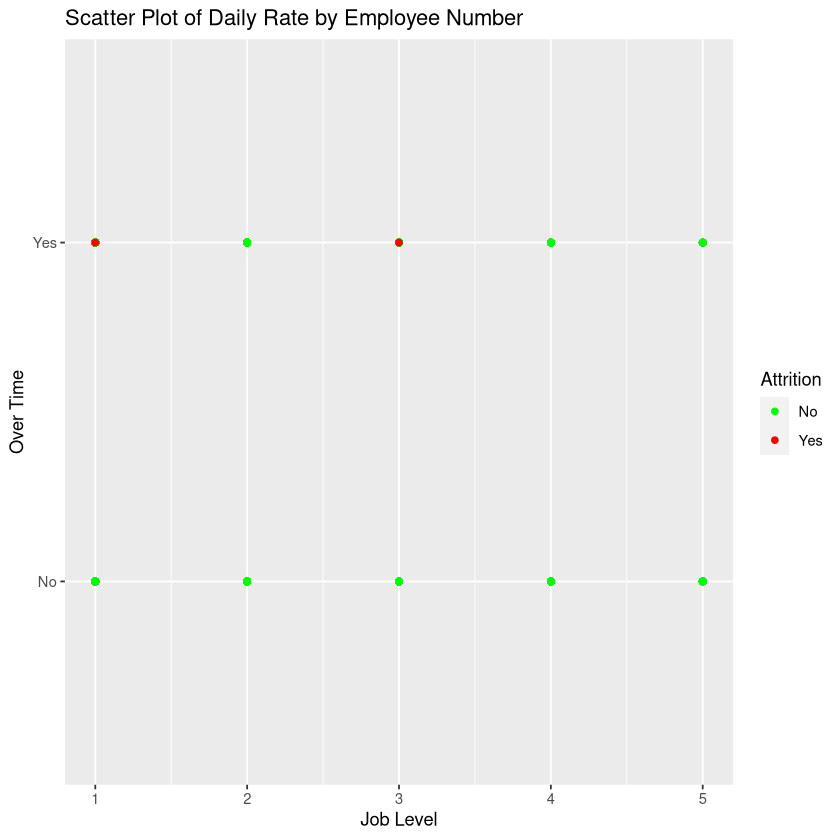

In [15]:
#this clearly shows that the attrition is not accuracy if take arguments with job level and overtime
ggplot(data = data_set, aes(x = data_set$JobLevel , y = data_set$OverTime, color = Attrition)) +
  geom_point() +
  labs(title = "Scatter Plot of Daily Rate by Employee Number",
       x = "Job Level",
       y = "Over Time") +
  scale_color_manual(values = c("No" = "green", "Yes" = "red"))


Warning message:
“Use of `data_set$YearsInCurrentRole` is discouraged.
ℹ Use `YearsInCurrentRole` instead.”
Warning message:
“Use of `data_set$Attrition` is discouraged.
ℹ Use `Attrition` instead.”


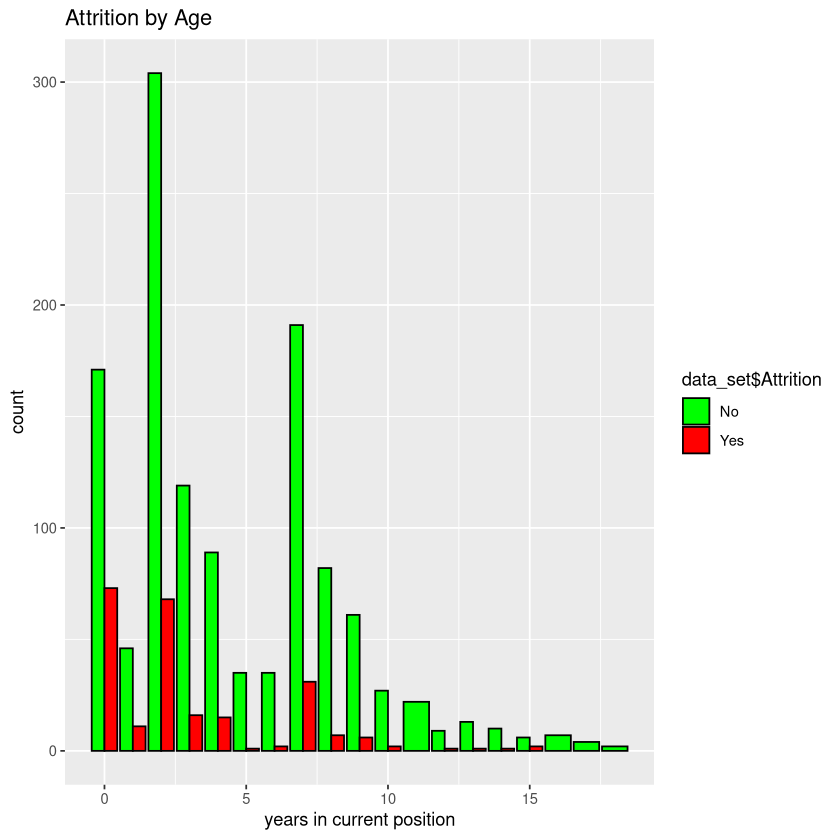

In [13]:
#this plot shows how much attrion is gonna come up with the current job role


ggplot(data = data_set, aes(x = data_set$YearsInCurrentRole, fill = data_set$Attrition)) +
  geom_bar(position = "dodge", color = "black", stat = "count") +
  labs(title = "Attrition by Age",
       x = "years in current position",
       y = "count") +
  scale_fill_manual(values = c("No" = "green", "Yes" = "red")) +
  theme(
     
  )



Warning message:
“Use of `data_set$EmployeeNumber` is discouraged.
ℹ Use `EmployeeNumber` instead.”
Warning message:
“Use of `data_set$DailyRate` is discouraged.
ℹ Use `DailyRate` instead.”


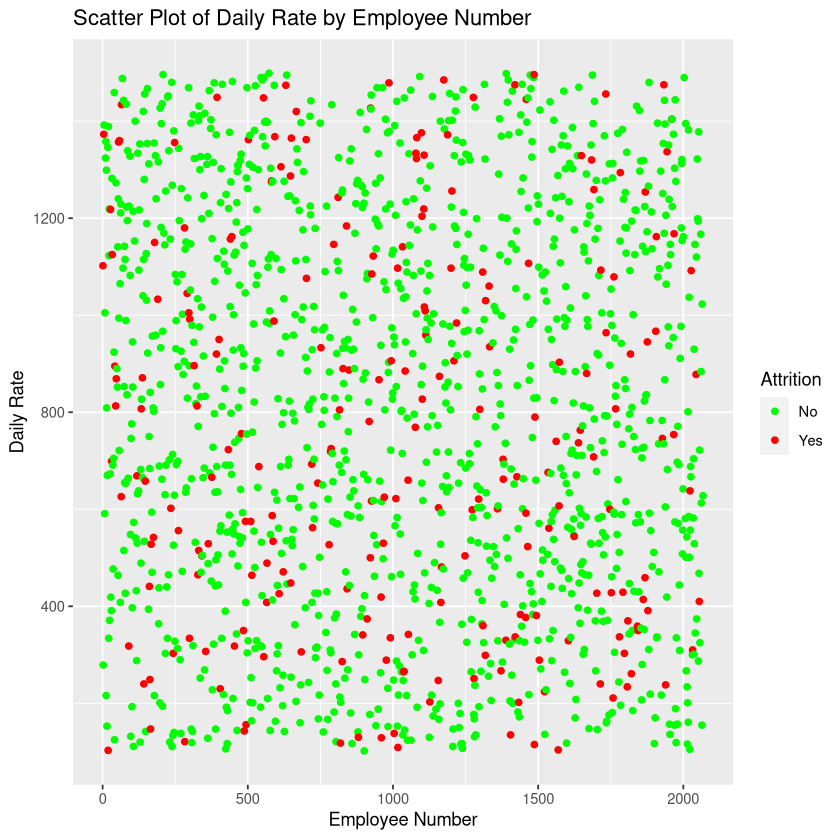

In [14]:
ggplot(data = data_set, aes(x = data_set$EmployeeNumber , y = data_set$DailyRate, color = Attrition)) +
  geom_point() +
  labs(title = "Scatter Plot of Daily Rate by Employee Number",
       x = "Employee Number",
       y = "Daily Rate") +
  scale_color_manual(values = c("No" = "green", "Yes" = "red"))



#this plot shows how much attrion is gonna come up with the last promotion for job role

Warning message:
“Use of `data_set$MonthlyIncome` is discouraged.
ℹ Use `MonthlyIncome` instead.”
Warning message:
“Use of `data_set$YearsAtCompany` is discouraged.
ℹ Use `YearsAtCompany` instead.”


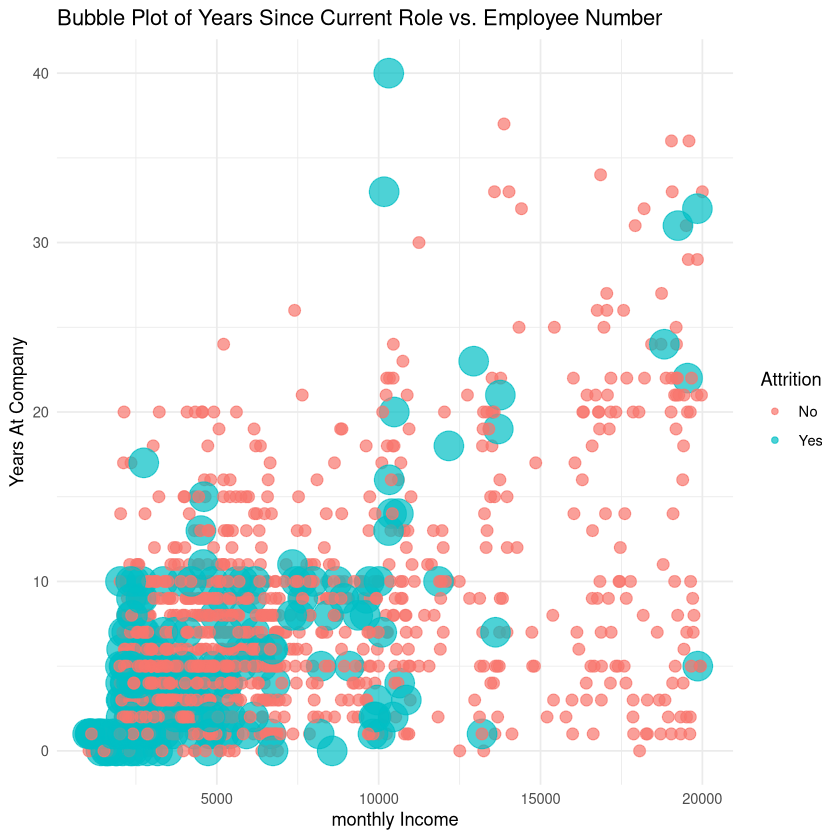

In [19]:
#this plot shows how the attrition is vary from the monthly income and years at company 
#so this will help to desicion tree to identify the attrition
ggplot(data_set, aes(x = data_set$MonthlyIncome, y = data_set$YearsAtCompany, size = factor(Attrition))) +
  geom_point(aes(color = factor(Attrition)), alpha = 0.7) +
  scale_size_manual(values = c(3, 8), guide = FALSE) +
  labs(title = "Bubble Plot of Years Since Current Role vs. Employee Number",
       x = "monthly Income",
       y = "Years At Company",
       color = "Attrition") +
  theme_minimal()



In [2]:
#this plot shows how the monthly income and distance from home is vary from the attrition

ggplot(data_set, aes(x = data_set$MonthlyIncome, y = data_set$DistanceFromHome, size = factor(Attrition))) +
  geom_point(aes(color = factor(Attrition)), alpha = 0.7) +
  scale_size_manual(values = c(3, 8), guide = FALSE) +
  labs(title = "Bubble Plot of monthly income affect of distance from home",
       x = "monthly Income",
       y = "distanceFrom Home rate",
       color = "Attrition") +
  theme_minimal()


ERROR: Error in eval(expr, envir, enclos): object 'data_set' not found


Warning message:
“Use of `data_set$HourlyRate` is discouraged.
ℹ Use `HourlyRate` instead.”
Warning message:
“Use of `data_set$JobRole` is discouraged.
ℹ Use `JobRole` instead.”


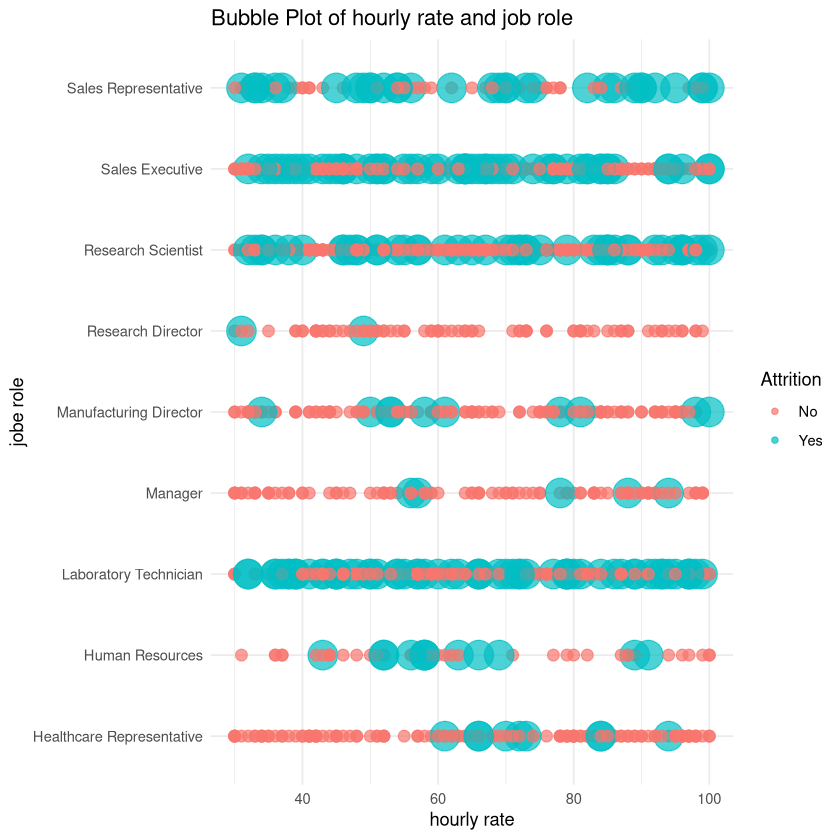

In [21]:
ggplot(data_set, aes(x = data_set$HourlyRate, y = data_set$JobRole, size = factor(Attrition))) +
  geom_point(aes(color = factor(Attrition)), alpha = 0.7) +
  scale_size_manual(values = c(3, 8), guide = FALSE) +
  labs(title = "Bubble Plot of hourly rate and job role",
       x = "hourly rate",
       y = "jobe role",
       color = "Attrition") +
  theme_minimal()

#this plot shows how the attrition is vary from the hourly rate and job role

Warning message:
“Use of `data_set$HourlyRate` is discouraged.
ℹ Use `HourlyRate` instead.”
Warning message:
“Use of `data_set$JobSatisfaction` is discouraged.
ℹ Use `JobSatisfaction` instead.”


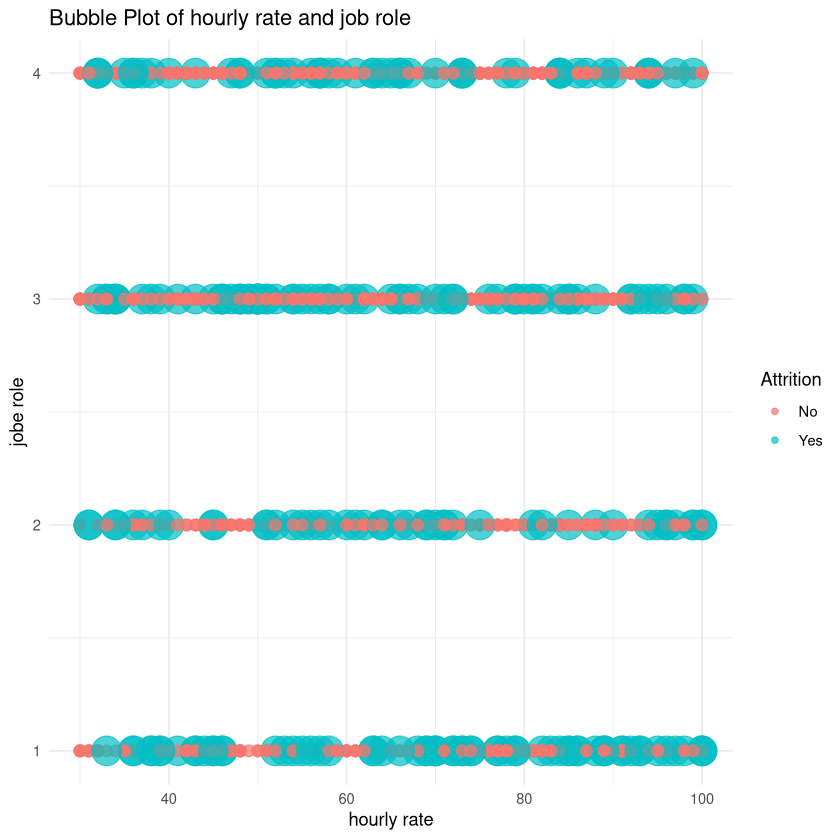

In [22]:
ggplot(data_set, aes(x = data_set$HourlyRate, y = data_set$JobSatisfaction, size = factor(Attrition))) +
  geom_point(aes(color = factor(Attrition)), alpha = 0.7) +
  scale_size_manual(values = c(3, 8), guide = FALSE) +
  labs(title = "Bubble Plot of hourly rate and job role",
       x = "hourly rate",
       y = "jobe role",
       color = "Attrition") +
  theme_minimal()

#this plot shows how the attrition is vary from the hourly rate and job satisfaction
#as this plot gets mixed up results so we can't take this plot for the decision tree

In [23]:
summary_data <- data_set %>%
  group_by(JobRole) %>%
  summarise(AvgMonthlyIncome = mean(data_set$MonthlyIncome, na.rm = TRUE))


ggplot(summary_data, aes(x = summary_data$JobRole, y = summary_data$AvgMonthlyIncome, fill = JobRole)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Monthly Income by Job Role",
       x = "Job Role",
       y = "Average Monthly Income") +
  theme_minimal()

#this plot shows how the attrition is vary from the job role and average monthly income
#as this plot shows the job role is gonna independent from anything

ERROR: Error in data_set %>% group_by(JobRole) %>% summarise(AvgMonthlyIncome = mean(data_set$MonthlyIncome, : could not find function "%>%"


Warning message:
“Use of `plot_data$EnvironmentSatisfaction` is discouraged.
ℹ Use `EnvironmentSatisfaction` instead.”


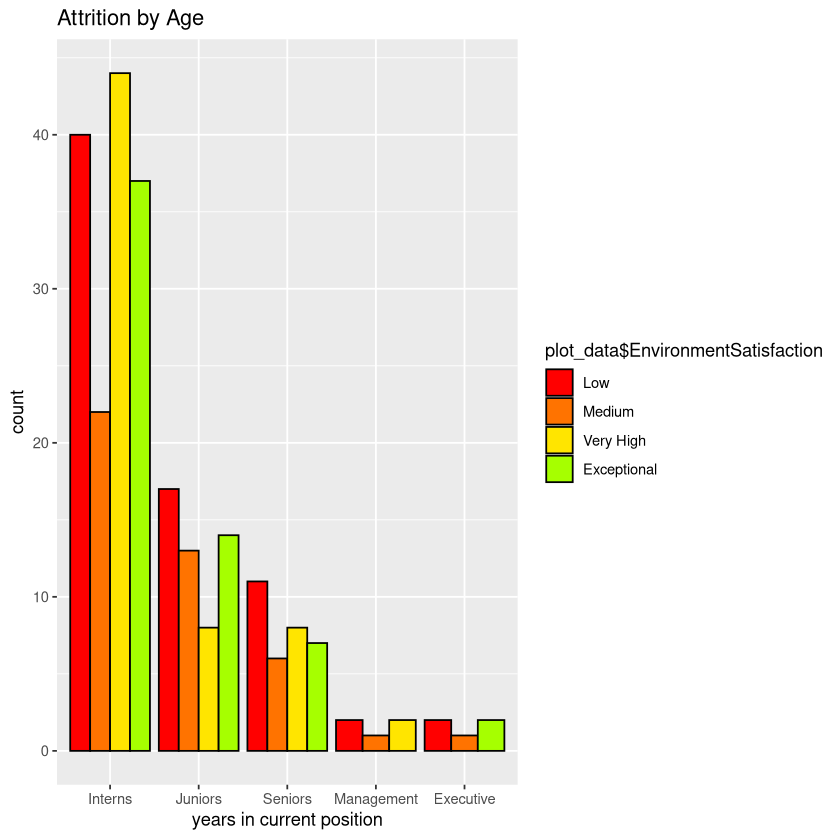

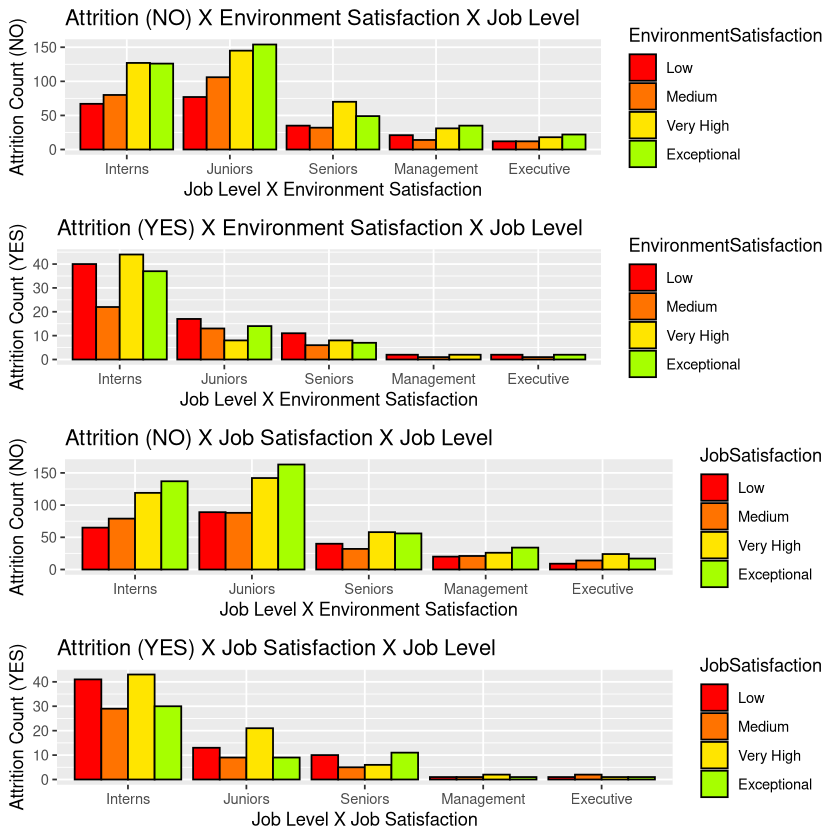

In [23]:
plot_data <- data_set %>% 
  filter(Attrition == "No")

plot_data$JobLevel <- cut(plot_data$JobLevel, breaks = 5, labels = c("Interns", "Juniors", "Seniors", "Management", "Executive"))
plot_data$JobSatisfaction <- cut(plot_data$JobSatisfaction, breaks = 5, labels = c("Low", "Medium", "High", "Very High", "Exceptional"))
plot_data$EnvironmentSatisfaction <- cut(plot_data$EnvironmentSatisfaction, breaks = 5, labels = c("Low", "Medium", "High", "Very High", "Exceptional"))

env_attr_no <- ggplot(data = plot_data, aes(x = factor(JobLevel), fill = EnvironmentSatisfaction)) +
  geom_bar(position = "dodge", color = "black", stat = "count") +
  labs(title = "Attrition (NO) X Environment Satisfaction X Job Level",
       x = "Job Level X Environment Satisfaction",
       y = "Attrition Count (NO)") +
  scale_fill_manual(values = rainbow(5, start = 0, end = 0.3))

js_attr_no <- ggplot(data = plot_data, aes(x = factor(JobLevel), fill = JobSatisfaction)) +
  geom_bar(position = "dodge", color = "black", stat = "count") +
  labs(title = "Attrition (NO) X Job Satisfaction X Job Level",
       x = "Job Level X Environment Satisfaction",
       y = "Attrition Count (NO)") +
  scale_fill_manual(values = rainbow(5, start = 0, end = 0.3))

plot_data <- data_set %>% 
  filter(Attrition == "Yes")

plot_data$JobLevel <- cut(plot_data$JobLevel, breaks = 5, labels = c("Interns", "Juniors", "Seniors", "Management", "Executive"))
plot_data$JobSatisfaction <- cut(plot_data$JobSatisfaction, breaks = 5, labels = c("Low", "Medium", "High", "Very High", "Exceptional"))
plot_data$EnvironmentSatisfaction <- cut(plot_data$EnvironmentSatisfaction, breaks = 5, labels = c("Low", "Medium", "High", "Very High", "Exceptional"))

env_attr_yes <- ggplot(data = plot_data, aes(x = factor(JobLevel), fill = EnvironmentSatisfaction)) +
  geom_bar(position = "dodge", color = "black", stat = "count") +
  labs(title = "Attrition (YES) X Environment Satisfaction X Job Level",
       x = "Job Level X Environment Satisfaction",
       y = "Attrition Count (YES)") +
  scale_fill_manual(values = rainbow(5, start = 0, end = 0.3))

js_attr_yes <- ggplot(data = plot_data, aes(x = factor(JobLevel), fill = JobSatisfaction)) +
  geom_bar(position = "dodge", color = "black", stat = "count") +
  labs(title = "Attrition (YES) X Job Satisfaction X Job Level",
       x = "Job Level X Job Satisfaction",
       y = "Attrition Count (YES)") +
  scale_fill_manual(values = rainbow(5, start = 0, end = 0.3))

grid.arrange(env_attr_no, env_attr_yes, js_attr_no, js_attr_yes, ncol = 1, nrow = 4)